# ENSF 519.01 Applied Data Science 
**Assignment 3** - 100 marks

**Due:** November 1st, 04.00 pm.


**IMPORTANT NOTE: each task must be implemented as asked, even if there are other easier or better solutions.**

**How to deliver:**
Edit this file and write your solutions in sections specified with `# Your solution`. Test your code and when you are done, submit this notebook as an `.ipynb` file to D2L dropbox. 



## Problem1: Heart disease diagnosis (75 points)

In this problem you are presented with a tabular dataset with 13 attributes that are thought to be good indicators of a heart diseases. We are going to train a number of clustering and binary classification algorithms on these data and see which ones perform better. 

The dataset is stored in CSV format. Use pandas `read_csv` to load it in python. (2 points)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

source_file = 'heart.csv'
data = pd.read_csv(source_file)
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


the last column, `target`, indicates if the patient had a heart disease. That column is used as the label and the rest are features in a 13-dimensional feature space. Separate the labels column from the rest of the dataset. (2 points)


In [2]:
# Your solution
features = data.drop(columns='target')
labels = data['target']

print(features.shape, labels.shape)  # Expected: (303, 13) (303,)

(303, 13) (303,)


### Finding the best classifiers

We want to compare the average performance of the algorithms. To make the comparison fair they need to be evaluated on the same training and test data, in other words we need to control the randomness in training/test data split. So we use a set of *fixed random seeds* for test and train splitting. (15 points)

1. Using `sklearn` split the data in two chunks, 1/4 and 3/4, looping over the predefined random seeds(from 5000 to 5051).
2. In each iteration create a `LogisticRegression` (use `liblinear` solver) and a `KNeighborsClassifier` (k=10) then train them on the training data.
3. In each iteration, evaluate the classifiers on the data and record their scores in the `scores` dictionary.
4. Convert the dictionary into a pandas dataframe and call `boxplot` on the dataframe to draw a boxplot of the data. Set the y axis range to (0, 1).

(0, 1)

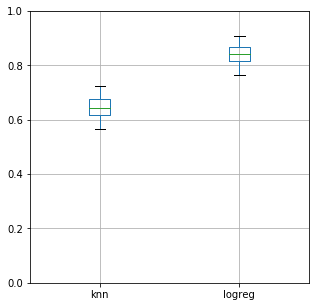

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# Your solution

logreg_scores = []
knn_scores = []
for i in range(5000, 5051):
    X_train, X_test, y_train, y_test = train_test_split(features, labels, random_state=i)

    logreg = LogisticRegression(solver='liblinear')
    logreg.fit(X_train, y_train)
    logreg_scores.append(logreg.score(X_test, y_test))
    
    knn = KNeighborsClassifier(n_neighbors=10)
    knn.fit(X_train, y_train)
    knn_scores.append(knn.score(X_test, y_test))

scores = {'knn': knn_scores, 'logreg': logreg_scores}

df = pd.DataFrame.from_dict(scores)

result = df.boxplot(figsize=(5,5))
result.set_ylim(0,1)

As you can see, with the current settings, logistic regression outperforms KNN algorithm. Let's see if we can help KNN to get better. We'll keep the random seed as a fixed number (5026) and experiment with different values for `k`. 

### Improving KNN
(20 points)

1. Split the data into training and testing chunks.
2. Train a logistic regression classifier on the training data, then evaluate it on the test data and store the value in `lr_score` variable. This is only used for comparison.
3. Complete the test_knn function below:

    1. Use a for loop to iterate through `k_range`, use these values for parameter `k` and train a KNN classifier. Pass all `knn_params` as keyword arguments to `KNeighboursClassifier`.
    2. Create a 3-tuple (k, train_score, test_score) and append it to scores list where train_score and test_score are the results of evaluating the classifier on the training and test data. 
    3. Convert the list of tuples into a pandas dataframe. Set appropriate column names, use `k` as the index.

4. Call test_knn and store the results in a variable. Use odd numbers from 3 to 25 as the first parameter.
5. Plot the accuracy scores. Add a horizontal dashed line to show the value of `lr_score` on the same plot. It would be nicer if you used another color for this line.

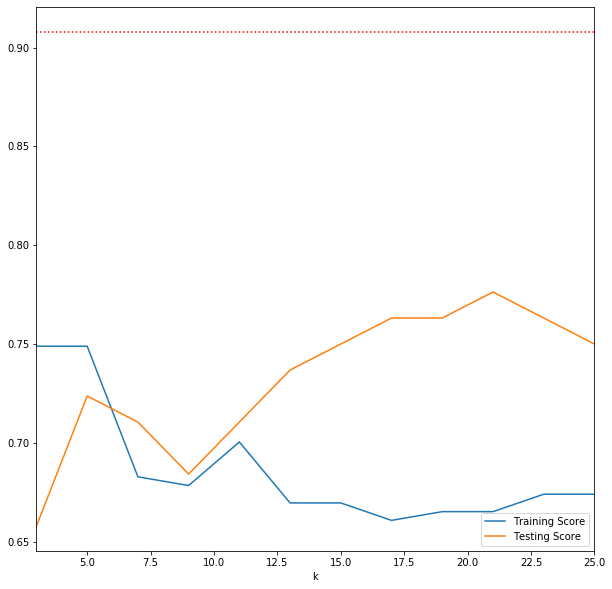

In [48]:
seed = 5026
# Your solution
X_train, X_test, y_train, y_test = train_test_split(features, labels, random_state=seed)

lr = LogisticRegression(solver='liblinear')
lr.fit(X_train, y_train)
lr_score = (lr.score(X_test, y_test))

def test_knn(k_range, X_train, X_test, y_train, y_test, **knn_params):
    scores = []
    for k_val in k_range:
        knn = KNeighborsClassifier(**knn_params, n_neighbors=k_val)
        knn.fit(X_train, y_train)
        
        scores.append((k_val, knn.score(X_train, y_train), knn.score(X_test, y_test)))
    
    df = pd.DataFrame(scores, columns=['k', 'Training Score', 'Testing Score'])
    df = df.set_index(df['k']).drop(columns='k')    
    return df  # Dataframe

k_arr = []
for k in range (3, 26, 2):
    k_arr.append(k)

df = test_knn(k_arr, X_train, X_test, y_train, y_test)
ax = df.plot.line(figsize=(10,10))
ax.axhline(y=lr_score, color='r', linestyle=':')






# TODO: AXIS AND CLEAN UP

You can see that with different values for K we can find the sweet spot between overfitting and generalization in KNN but it never gets good enough to beat logistic regression.

We can change also experiment with changing the [`weights` parameter](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) in KNN from its default `uniform` value to `distance`. Call the `test_knn` function again with the same range for `k`, this time passing `weights` parameter as well. Plot the training and test scores as well as the horizontal dashed line that shows `lr_score`. (5 points)

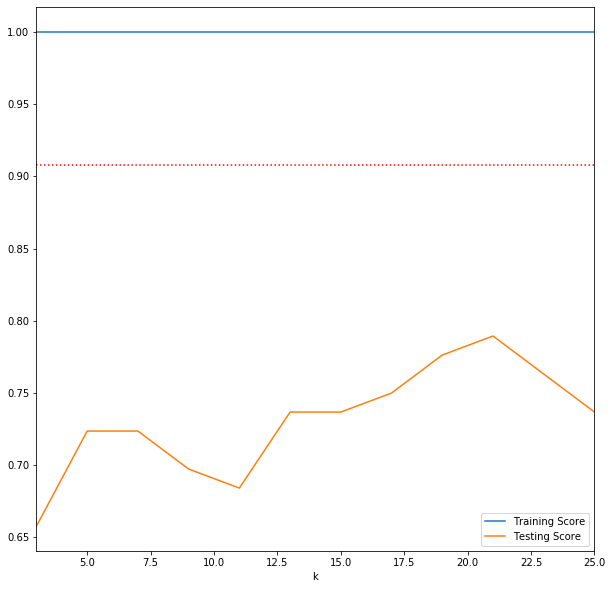

In [51]:
# Your solution
k_arr = []
for k in range (3, 26, 2):
    k_arr.append(k)

df = test_knn(k_arr, X_train, X_test, y_train, y_test, weights='distance')
ax = df.plot.line(figsize=(10,10))
ax.axhline(y=lr_score, color='r', linestyle=':')


# TODO: I think this is wrong

Even though it's overfitting, it performs better on the test set than the previous one. Yet, it's no better than logistic regression.

### Combining the models (ensemble model)

A common way of maximizing the accuracy is to train multiple models and use all for prediction. In a classification problem we use the class that the majority of models have predicted and in a regression problem a weighted average of the predictions is used.

Make a function that creates and trains 3 models and returns them in a list. The models are:

* A Logistic Regressor with 'liblinear' solver
* A KNN classifiers with k = 10 and setting `weights` to 'distance'
* Another KNN with k = 20 and setting `weights` to 'distance'

and the inputs to the function are X and Y values for the training set. (12 points)

In [53]:
def create_models(X_train, y_train):
    logreg = LogisticRegression(solver='liblinear')
    logreg.fit(X_train, y_train)
    
    knn_10 = KNeighborsClassifier(n_neighbors=10, weights='distance')
    knn_10.fit(X_train, y_train)
    
    knn_20 = KNeighborsClassifier(n_neighbors=20, weights='distance')
    knn_20.fit(X_train, y_train)
    return (logreg, knn_10, knn_20)

models = create_models(X_train, y_train)

Create a `predict` function that takes in a list of models and the input vectors (X) and returns the output vector Y using majority voting. To find the majority in an easy way use `mode` function in `scipy` since it supports vectorized operations. (6 points)

In [69]:
from scipy.stats import mode

def predict(models, X):
    # Your solution
    final_output = []
    for model in models:
        final_output.append(model.predict(X))
        
    rv_mode, rv_count = mode(final_output)
    return rv_mode[0]
    
predict(models, X_test)  # Expected: 0, 1, 1, 1, 1, 0, 0, 0, ...

array([0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1])

Use a loop similar to the first part (Finding the best classifiers) to compare the performance of each of the models in the ensemble (=the model list created by `create_models`) and the combined model (call the `predict` function above). To evaluate the accuracy of the combined model use `sklearn.metrics.accuracy_score` method. Draw the boxplot in the end. (13 points)

(0, 1)

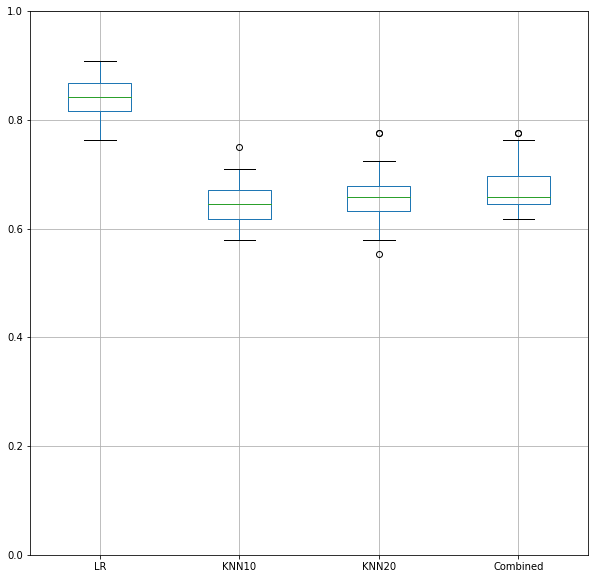

In [90]:
from sklearn.metrics import accuracy_score

# Your solution
# Use LR, KNN15, KNN20, and Combined for the column names

scores = []
for i in range(5000, 5051):
    X_train, X_test, y_train, y_test = train_test_split(features, labels, random_state=i)
    models = create_models(X_train, y_train)
    y_outputs = []
    for model in models:
        y_outputs.append(predict([model], X_test))
    
    y_outputs.append(predict(models, X_test))
    
    true_vals = []
    for y_output in y_outputs:
        true_vals.append(np.mean(y_output == y_test))
    
    scores.append(true_vals)

df = pd.DataFrame(scores, columns=['LR', 'KNN10', 'KNN20', 'Combined'])
result = df.boxplot(figsize=(10,10))
result.set_ylim(0,1)


# TODO: MAYBE USE THE FUNCTION THEY WANTED TO CALCULATE COMBINED 

Did the result get better than the individual KNN models?

## Problem2: Bike sharing (25 points)

In this problem we are going to use linear regression to predict the number of bike sharif platfor quality of wine from 1-10. Read the data from CSV file, use 'cnt' column as the target values and all other columns (except 'dteday') as the features (4 points).

In [116]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge

# Your solution
source_file = 'bikes.csv'
data = pd.read_csv(source_file)
data

features = data.drop(columns=['dteday', 'cnt'])
target = data['cnt']

print(features.shape, target.shape) # Expected: (731, 11) (731,)

(731, 11) (731,)


Split the data in two 1/4 and 3/4 chunks for training and testing, use the number 15 as the `random_state` parameter. (2 points)

In [96]:
# Your solution
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=15)

Train a linear regression model on the data and report the training and test scores. (5 points)

In [99]:
# Your solution

lr = LinearRegression().fit(X_train, y_train)

training_score = lr.score(X_train, y_train)
test_score = lr.score(X_test, y_test)
print(f'Training={training_score:.4}\tTest={test_score:.4}')  # Expected: Training=0.7989	Test=0.7857

Training=0.7989	Test=0.7857


Regularize the regression model using ridge method. Train it with 10 values of alpha and report training and test scores. (7 points)

In [109]:
alpha_values = [1e-3, 1e-2, 1e-1, 1., 2., 5., 10., 20., 50., 100.]

for alpha in alpha_values:
    # Your solution
    ridge = Ridge(alpha=alpha).fit(X_train, y_train)
    
    training_score = ridge.score(X_train, y_train)
    test_score = ridge.score(X_test, y_test)
    print(f'⍺={alpha:.5}\tTraining={training_score:.4}\tTest={test_score:.4}')

# First line of expected value:
# ⍺=0.001	Training=0.7989	Test=0.7858

⍺=0.001	Training=0.7989	Test=0.7858
⍺=0.01	Training=0.7989	Test=0.7865
⍺=0.1	Training=0.7987	Test=0.788
⍺=1.0	Training=0.7975	Test=0.7875
⍺=2.0	Training=0.7956	Test=0.7856
⍺=5.0	Training=0.789	Test=0.7781
⍺=10.0	Training=0.7768	Test=0.7638
⍺=20.0	Training=0.7511	Test=0.7339
⍺=50.0	Training=0.6836	Test=0.6562
⍺=100.0	Training=0.601	Test=0.5631


Use the same alpha values, train a lasso regualizer this time. Report the names of the features that got a 0 coefficient after regulazition. Separate their names with a comma, if none of them were omitted report 'no features'. (9 points)

In [110]:
alpha_values = [1e-3, 1e-2, 1e-1, 1., 2., 5., 10., 20., 50., 100.]

for alpha in alpha_values:
    # Your solution
    lasso = Lasso(alpha=alpha, max_iter=100000).fit(X_train, y_train)
    
    training_score = lasso.score(X_train, y_train)
    test_score = lasso.score(X_test, y_test)
    zeroed_out_feature_names = np.sum(lasso.coef_ != 0)
    print(f'⍺={alpha:.5}\tTraining={training_score:.4}\tTest={test_score:.4}\t{zeroed_out_feature_names}')
    
# First line of expected value:
# ⍺=0.001	Training=0.7989	Test=0.7857	no features

⍺=0.001	Training=0.7989	Test=0.7857	11
⍺=0.01	Training=0.7989	Test=0.7857	11
⍺=0.1	Training=0.7989	Test=0.7859	11
⍺=1.0	Training=0.7988	Test=0.7865	11
⍺=2.0	Training=0.7984	Test=0.7869	11
⍺=5.0	Training=0.796	Test=0.7857	11
⍺=10.0	Training=0.7889	Test=0.7783	10
⍺=20.0	Training=0.7796	Test=0.7694	7
⍺=50.0	Training=0.7571	Test=0.7476	7
⍺=100.0	Training=0.6854	Test=0.6755	5
